In [1]:
from simple_multi_unet_model import multi_unet_model  # Uses softmax

from keras.utils import normalize
import os
import glob
import cv2
import numpy as np
from matplotlib import pyplot as plt



# Resizing images, if needed
# SIZE_X = 128
# SIZE_Y = 128
n_classes = 29  # Number of classes for segmentation

Using TensorFlow backend.


In [2]:

train_images = []
directory_path = "data/train_images/"

# Get all image paths and sort them
img_paths = sorted(glob.glob(os.path.join(directory_path, "*.png")))

# Iterate through sorted image paths
for img_path in img_paths:
    print(img_path)
    img = cv2.imread(img_path, 0)  # Read the image in grayscale mode
    img = np.pad(img, [(4, 4), (0, 0)], 'constant', constant_values=0)
    # img = cv2.resize(img, (SIZE_Y, SIZE_X))  # Uncomment if resizing is needed
    train_images.append(img)
    
# Convert list to array for machine learning processing
train_images = np.array(train_images)


data/train_images/0000.png
data/train_images/0001.png
data/train_images/0002.png
data/train_images/0003.png
data/train_images/0004.png
data/train_images/0005.png
data/train_images/0006.png
data/train_images/0007.png
data/train_images/0008.png
data/train_images/0009.png
data/train_images/0010.png
data/train_images/0011.png
data/train_images/0012.png
data/train_images/0013.png
data/train_images/0014.png
data/train_images/0015.png
data/train_images/0016.png
data/train_images/0017.png
data/train_images/0018.png
data/train_images/0019.png
data/train_images/0020.png
data/train_images/0021.png
data/train_images/0022.png
data/train_images/0023.png
data/train_images/0024.png
data/train_images/0025.png
data/train_images/0026.png
data/train_images/0027.png
data/train_images/0028.png
data/train_images/0029.png
data/train_images/0030.png
data/train_images/0031.png
data/train_images/0032.png
data/train_images/0033.png
data/train_images/0034.png
data/train_images/0035.png
data/train_images/0036.png
d

data/train_images/0309.png
data/train_images/0310.png
data/train_images/0311.png
data/train_images/0312.png
data/train_images/0313.png
data/train_images/0314.png
data/train_images/0315.png
data/train_images/0316.png
data/train_images/0317.png
data/train_images/0318.png
data/train_images/0319.png
data/train_images/0320.png
data/train_images/0321.png
data/train_images/0322.png
data/train_images/0323.png
data/train_images/0324.png
data/train_images/0325.png
data/train_images/0326.png
data/train_images/0327.png
data/train_images/0328.png
data/train_images/0329.png
data/train_images/0330.png
data/train_images/0331.png
data/train_images/0332.png
data/train_images/0333.png
data/train_images/0334.png
data/train_images/0335.png
data/train_images/0336.png
data/train_images/0337.png
data/train_images/0338.png
data/train_images/0339.png
data/train_images/0340.png
data/train_images/0341.png
data/train_images/0342.png
data/train_images/0343.png
data/train_images/0344.png
data/train_images/0345.png
d

In [3]:
train_masks = []
directory_path = "data/train_masks/"

# Get all mask paths and sort them
mask_paths = sorted(glob.glob(os.path.join(directory_path, "*.png")))

# Iterate through sorted mask paths
for mask_path in mask_paths:
    print(mask_path)
    mask = cv2.imread(mask_path, 0)  # Read the mask in grayscale mode
    mask = np.pad(mask, [(4, 4), (0, 0)], 'constant', constant_values=0)
    # mask = cv2.resize(mask, (SIZE_Y, SIZE_X), interpolation=cv2.INTER_NEAREST)  # Uncomment if resizing is needed
    train_masks.append(mask)

# Convert list to array for machine learning processing
train_masks = np.array(train_masks)

data/train_masks/0000.png
data/train_masks/0001.png
data/train_masks/0002.png
data/train_masks/0003.png
data/train_masks/0004.png
data/train_masks/0005.png
data/train_masks/0006.png
data/train_masks/0007.png
data/train_masks/0008.png
data/train_masks/0009.png
data/train_masks/0010.png
data/train_masks/0011.png
data/train_masks/0012.png
data/train_masks/0013.png
data/train_masks/0014.png
data/train_masks/0015.png
data/train_masks/0016.png
data/train_masks/0017.png
data/train_masks/0018.png
data/train_masks/0019.png
data/train_masks/0020.png
data/train_masks/0021.png
data/train_masks/0022.png
data/train_masks/0023.png
data/train_masks/0024.png
data/train_masks/0025.png
data/train_masks/0026.png
data/train_masks/0027.png
data/train_masks/0028.png
data/train_masks/0029.png
data/train_masks/0030.png
data/train_masks/0031.png
data/train_masks/0032.png
data/train_masks/0033.png
data/train_masks/0034.png
data/train_masks/0035.png
data/train_masks/0036.png
data/train_masks/0037.png
data/train_m

data/train_masks/0328.png
data/train_masks/0329.png
data/train_masks/0330.png
data/train_masks/0331.png
data/train_masks/0332.png
data/train_masks/0333.png
data/train_masks/0334.png
data/train_masks/0335.png
data/train_masks/0336.png
data/train_masks/0337.png
data/train_masks/0338.png
data/train_masks/0339.png
data/train_masks/0340.png
data/train_masks/0341.png
data/train_masks/0342.png
data/train_masks/0343.png
data/train_masks/0344.png
data/train_masks/0345.png
data/train_masks/0346.png
data/train_masks/0347.png
data/train_masks/0348.png
data/train_masks/0349.png
data/train_masks/0350.png
data/train_masks/0351.png
data/train_masks/0352.png
data/train_masks/0353.png
data/train_masks/0354.png
data/train_masks/0355.png
data/train_masks/0356.png
data/train_masks/0357.png
data/train_masks/0358.png
data/train_masks/0359.png
data/train_masks/0360.png
data/train_masks/0361.png
data/train_masks/0362.png
data/train_masks/0363.png
data/train_masks/0364.png
data/train_masks/0365.png
data/train_m

In [4]:
###############################################
# Encode labels... but multi dim array so need to flatten, encode and reshape
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
n, h, w = train_masks.shape
train_masks_reshaped = train_masks.reshape(-1, 1)
train_masks_reshaped_encoded = labelencoder.fit_transform(train_masks_reshaped)
train_masks_encoded_original_shape = train_masks_reshaped_encoded.reshape(n, h, w)

del train_masks_reshaped ,train_masks


np.unique(train_masks_encoded_original_shape)

/home/gonellas/azizi022/.conda/envs/U-net/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])

In [5]:
#################################################
train_images = np.expand_dims(train_images, axis=3)
train_images = normalize(train_images, axis=1)

train_masks_input = np.expand_dims(train_masks_encoded_original_shape, axis=3)

# Create a subset of data for quick testing
# Picking 10% for testing and remaining for training
from sklearn.model_selection import train_test_split

X1, X_test, y1, y_test = train_test_split(train_images, train_masks_input, test_size=0.10, random_state=0)

# Further split training data t a smaller subset for quick testing of models
X_train, X_do_not_use, y_train, y_do_not_use = train_test_split(X1, y1, test_size=0.70, random_state=0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

del X1, y1, X_do_not_use, y_do_not_use, train_images, train_masks_input

print("Class values in the dataset are ... ", np.unique(y_train))  # 0 is the background/few unlabeled

(135, 688, 1200, 1) (135, 688, 1200, 1) (50, 688, 1200, 1) (50, 688, 1200, 1)
Class values in the dataset are ...  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]


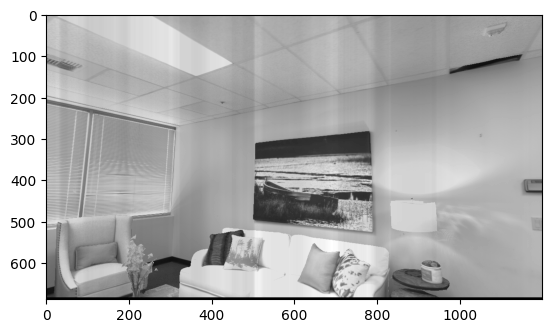

In [8]:
plt.imshow(X_train[100, :, :, 0], cmap='gray')

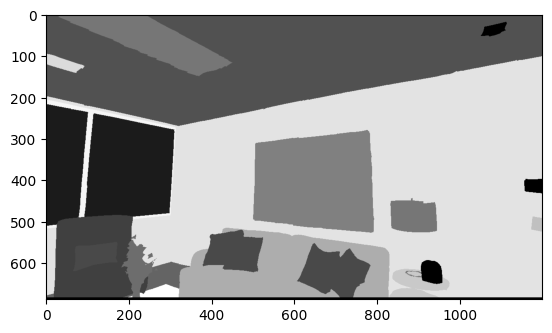

In [9]:
plt.imshow(y_train[100, :, :, 0], cmap='gray')

In [10]:
from keras.utils import to_categorical

train_masks_cat = to_categorical(y_train, num_classes=n_classes)
y_train_cat = train_masks_cat.reshape((y_train.shape[0], y_train.shape[1], y_train.shape[2], n_classes))

test_masks_cat = to_categorical(y_test, num_classes=n_classes)
y_test_cat = test_masks_cat.reshape((y_test.shape[0], y_test.shape[1], y_test.shape[2], n_classes))

In [11]:
###############################################################
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(class_weight = 'balanced',
                                                  classes = np.unique(train_masks_reshaped_encoded),
                                                  y = train_masks_reshaped_encoded)
print("Class weights are...:", class_weights)

del train_masks_reshaped_encoded

Class weights are...: [1.55592944e+00 2.54052000e+01 3.49684198e+00 2.19895804e-01
 1.36944029e+01 2.80076901e+00 1.09980783e+02 1.15804168e+00
 9.13024608e-01 5.41790411e-01 2.79076916e+00 5.23171582e-01
 1.07014439e+01 2.09733039e+00 9.87364039e-01 3.51498826e+00
 4.44008945e+01 1.68961301e+02 1.29016635e+01 4.10026592e-01
 2.02808256e+00 1.04877383e+02 1.33395985e+00 5.88800299e+01
 7.40900812e+01 1.19350244e-01 2.72978862e+02 1.24247182e+00
 4.78782996e-01]


In [12]:

IMG_HEIGHT = X_train.shape[1]
IMG_WIDTH = X_train.shape[2]
IMG_CHANNELS = X_train.shape[3]

print(y_train_cat.shape,y_test_cat.shape,n_classes, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

(135, 688, 1200, 29) (50, 688, 1200, 29) 29 688 1200 1


In [13]:

def get_model():
    return multi_unet_model(n_classes=n_classes, IMG_HEIGHT=IMG_HEIGHT, IMG_WIDTH=IMG_WIDTH, IMG_CHANNELS=IMG_CHANNELS)



model = get_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 688, 1200, 1) 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 688, 1200, 16 160         input_1[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 688, 1200, 16 0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 688, 1200, 16 2320        dropout_1[0][0]     

In [ ]:

# def get_model():
#     return multi_unet_model(n_classes=n_classes, IMG_HEIGHT=IMG_HEIGHT, IMG_WIDTH=IMG_WIDTH, IMG_CHANNELS=IMG_CHANNELS)

# import keras.optimizers

# optimizer = keras.optimizers.Adam(lr=0.1)


# model = get_model()
# model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()

# import keras.backend as K

# print("Learning Rate:", K.get_value(model.optimizer.lr))

# If starting with pre-trained weights.
# model.load_weights('???.hdf5')

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('Weights/model_weights_epoch_{epoch:02d}.hdf5', 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=False, 
                             save_weights_only=True, 
                             mode='auto', 
                             period=1)

In [14]:
history = model.fit(X_train, y_train_cat,
                    batch_size=5,
                    verbose=1,
                    epochs=50,
                    validation_data=(X_test, y_test_cat),
                    class_weight=class_weights,
                    shuffle=False)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 135 samples, validate on 50 samples
Epoch 1/50




2023-12-11 16:26:22.199324: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2023-12-11 16:26:22.205944: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2445515000 Hz
2023-12-11 16:26:22.206792: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5555777c9670 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-12-11 16:26:22.206833: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2023-12-11 16:26:22.211834: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1


2023-12-11 16:26:22.403348: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5555777cbb30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-11 16:26:22.403417: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA A40, Compute Capability 8.6
2023-12-11 16:26:22.405708: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: NVIDIA A40 major: 8 minor: 6 memoryClockRate(GHz): 1.74
pciBusID: 0000:88:00.0
2023-12-11 16:26:22.407298: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2023-12-11 16:26:22.412359: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
2023-12-11 16:26:22.420966: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10.0
2023-12-11 16:26:22.42772


135/135 [==============================] - 183s 1s/step - loss: 3.1598 - acc: 0.1187 - val_loss: 2.9568 - val_acc: 0.2561
Epoch 2/50
135/135 [==============================] - 180s 1s/step - loss: 2.7077 - acc: 0.2631 - val_loss: 2.5859 - val_acc: 0.2946
Epoch 3/50
135/135 [==============================] - 182s 1s/step - loss: 2.4729 - acc: 0.2853 - val_loss: 2.4379 - val_acc: 0.2947
Epoch 4/50
135/135 [==============================] - 181s 1s/step - loss: 2.3949 - acc: 0.2900 - val_loss: 2.3606 - val_acc: 0.2948
Epoch 5/50
135/135 [==============================] - 182s 1s/step - loss: 2.2915 - acc: 0.3193 - val_loss: 2.2200 - val_acc: 0.3461
Epoch 6/50
135/135 [==============================] - 180s 1s/step - loss: 2.1599 - acc: 0.3523 - val_loss: 2.0868 - val_acc: 0.3610
Epoch 7/50
135/135 [==============================] - 180s 1s/step - loss: 2.0281 - acc: 0.3764 - val_loss: 2.0010 - val_acc: 0.3895
Epoch 8/50
135/135 [==============================] - 180s 1s/step - loss: 1.92

In [15]:
model.save('room_0.hdf5')

50/50 [==============================] - 12s 240ms/step
Accuracy is =  96.16607999801636 %


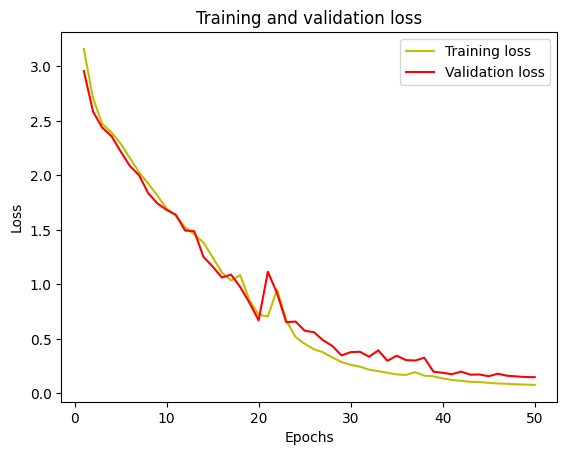

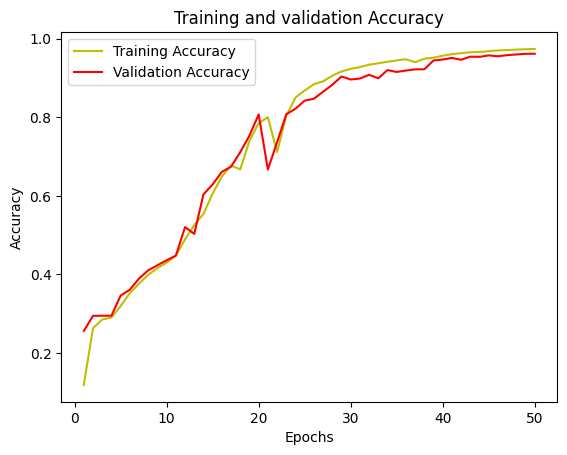

In [16]:
# model.save('sandstone_50_epochs_catXentropy_acc_with_weights.hdf5')
############################################################
# Evaluate the model
# evaluate model
_, acc = model.evaluate(X_test, y_test_cat)
print("Accuracy is = ", (acc * 100.0), "%")

###
# plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.load_weights('room_0.hdf5')

In [ ]:
##################################
# model = get_model()

# model.load_weights('sandstone_50_epochs_catXentropy_acc_with_weights.hdf5')

# IOU
y_pred = model.predict(X_test)
y_pred_argmax = np.argmax(y_pred, axis=3)

In [ ]:
# Using built in keras function
from keras.metrics import MeanIoU

n_classes = 29
IOU_keras = MeanIoU(num_classes=n_classes)
IOU_keras.update_state(y_test[:, :, :, 0], y_pred_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

In [ ]:
##################################################



# To calculate I0U for each class...
values = np.array(IOU_keras.get_weights()).reshape(n_classes, n_classes)
print(values)
class1_IoU = values[0, 0] / (
            values[0, 0] + values[0, 1] + values[0, 2] + values[0, 3] + values[1, 0] + values[2, 0] + values[3, 0])
class2_IoU = values[1, 1] / (
            values[1, 1] + values[1, 0] + values[1, 2] + values[1, 3] + values[0, 1] + values[2, 1] + values[3, 1])
class3_IoU = values[2, 2] / (
            values[2, 2] + values[2, 0] + values[2, 1] + values[2, 3] + values[0, 2] + values[1, 2] + values[3, 2])
class4_IoU = values[3, 3] / (
            values[3, 3] + values[3, 0] + values[3, 1] + values[3, 2] + values[0, 3] + values[1, 3] + values[2, 3])

print("IoU for class1 is: ", class1_IoU)
print("IoU for class2 is: ", class2_IoU)
print("IoU for class3 is: ", class3_IoU)
print("IoU for class4 is: ", class4_IoU)

In [17]:
train_images = []
directory_path = "data/train_images/"

# Get all image paths and sort them
img_paths = sorted(glob.glob(os.path.join(directory_path, "*.png")))

# Iterate through sorted image paths
for img_path in img_paths:
    print(img_path)
    img = cv2.imread(img_path, 0)  # Read the image in grayscale mode
    img = np.pad(img, [(4, 4), (0, 0)], 'constant', constant_values=0)
    # img = cv2.resize(img, (SIZE_Y, SIZE_X))  # Uncomment if resizing is needed
    train_images.append(img)
    
# Convert list to array for machine learning processing
train_images = np.array(train_images)


data/train_images/0000.png
data/train_images/0001.png
data/train_images/0002.png
data/train_images/0003.png
data/train_images/0004.png
data/train_images/0005.png
data/train_images/0006.png
data/train_images/0007.png
data/train_images/0008.png
data/train_images/0009.png
data/train_images/0010.png
data/train_images/0011.png
data/train_images/0012.png
data/train_images/0013.png
data/train_images/0014.png
data/train_images/0015.png
data/train_images/0016.png
data/train_images/0017.png
data/train_images/0018.png
data/train_images/0019.png
data/train_images/0020.png
data/train_images/0021.png
data/train_images/0022.png
data/train_images/0023.png
data/train_images/0024.png
data/train_images/0025.png
data/train_images/0026.png
data/train_images/0027.png
data/train_images/0028.png
data/train_images/0029.png
data/train_images/0030.png
data/train_images/0031.png
data/train_images/0032.png
data/train_images/0033.png
data/train_images/0034.png
data/train_images/0035.png
data/train_images/0036.png
d

data/train_images/0304.png
data/train_images/0305.png
data/train_images/0306.png
data/train_images/0307.png
data/train_images/0308.png
data/train_images/0309.png
data/train_images/0310.png
data/train_images/0311.png
data/train_images/0312.png
data/train_images/0313.png
data/train_images/0314.png
data/train_images/0315.png
data/train_images/0316.png
data/train_images/0317.png
data/train_images/0318.png
data/train_images/0319.png
data/train_images/0320.png
data/train_images/0321.png
data/train_images/0322.png
data/train_images/0323.png
data/train_images/0324.png
data/train_images/0325.png
data/train_images/0326.png
data/train_images/0327.png
data/train_images/0328.png
data/train_images/0329.png
data/train_images/0330.png
data/train_images/0331.png
data/train_images/0332.png
data/train_images/0333.png
data/train_images/0334.png
data/train_images/0335.png
data/train_images/0336.png
data/train_images/0337.png
data/train_images/0338.png
data/train_images/0339.png
data/train_images/0340.png
d

In [18]:
train_masks = []
directory_path = "data/train_masks/"

# Get all mask paths and sort them
mask_paths = sorted(glob.glob(os.path.join(directory_path, "*.png")))

# Iterate through sorted mask paths
for mask_path in mask_paths:
    print(mask_path)
    mask = cv2.imread(mask_path, 0)  # Read the mask in grayscale mode
    mask = np.pad(mask, [(4, 4), (0, 0)], 'constant', constant_values=0)
    # mask = cv2.resize(mask, (SIZE_Y, SIZE_X), interpolation=cv2.INTER_NEAREST)  # Uncomment if resizing is needed
    train_masks.append(mask)

# Convert list to array for machine learning processing
train_masks = np.array(train_masks)

data/train_masks/0000.png
data/train_masks/0001.png
data/train_masks/0002.png
data/train_masks/0003.png
data/train_masks/0004.png
data/train_masks/0005.png
data/train_masks/0006.png
data/train_masks/0007.png
data/train_masks/0008.png
data/train_masks/0009.png
data/train_masks/0010.png
data/train_masks/0011.png
data/train_masks/0012.png
data/train_masks/0013.png
data/train_masks/0014.png
data/train_masks/0015.png
data/train_masks/0016.png
data/train_masks/0017.png
data/train_masks/0018.png
data/train_masks/0019.png
data/train_masks/0020.png
data/train_masks/0021.png
data/train_masks/0022.png
data/train_masks/0023.png
data/train_masks/0024.png
data/train_masks/0025.png
data/train_masks/0026.png
data/train_masks/0027.png
data/train_masks/0028.png
data/train_masks/0029.png
data/train_masks/0030.png
data/train_masks/0031.png
data/train_masks/0032.png
data/train_masks/0033.png
data/train_masks/0034.png
data/train_masks/0035.png
data/train_masks/0036.png
data/train_masks/0037.png
data/train_m

data/train_masks/0336.png
data/train_masks/0337.png
data/train_masks/0338.png
data/train_masks/0339.png
data/train_masks/0340.png
data/train_masks/0341.png
data/train_masks/0342.png
data/train_masks/0343.png
data/train_masks/0344.png
data/train_masks/0345.png
data/train_masks/0346.png
data/train_masks/0347.png
data/train_masks/0348.png
data/train_masks/0349.png
data/train_masks/0350.png
data/train_masks/0351.png
data/train_masks/0352.png
data/train_masks/0353.png
data/train_masks/0354.png
data/train_masks/0355.png
data/train_masks/0356.png
data/train_masks/0357.png
data/train_masks/0358.png
data/train_masks/0359.png
data/train_masks/0360.png
data/train_masks/0361.png
data/train_masks/0362.png
data/train_masks/0363.png
data/train_masks/0364.png
data/train_masks/0365.png
data/train_masks/0366.png
data/train_masks/0367.png
data/train_masks/0368.png
data/train_masks/0369.png
data/train_masks/0370.png
data/train_masks/0371.png
data/train_masks/0372.png
data/train_masks/0373.png
data/train_m

In [19]:

#################################################
train_images = np.expand_dims(train_images, axis=3)
train_images = normalize(train_images, axis=1)


In [20]:
print(train_images.shape)
print(train_masks.shape)

(500, 688, 1200, 1)
(500, 688, 1200)


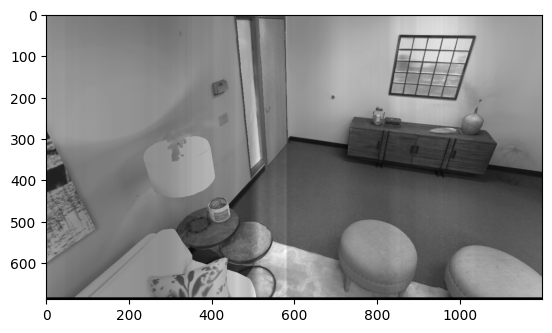

In [21]:
plt.imshow(train_images[0, :, :, 0], cmap='gray')

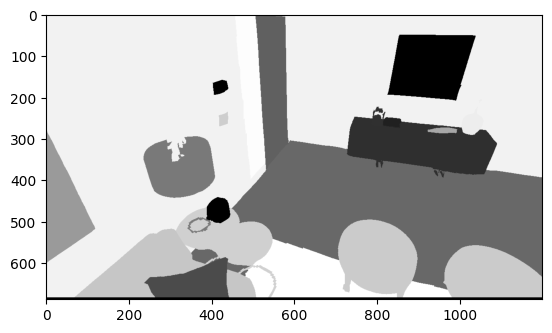

In [22]:
plt.imshow(train_masks[0], cmap='gray')

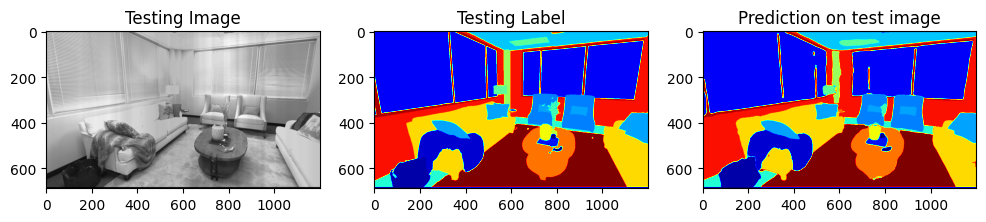

In [24]:



#######################################################################
# Predict on a few images
# model = get_model()
# model.load_weights('???.hdf5')
import random

test_img_number = random.randint(0, len(X_test))
test_img = X_test[test_img_number]
ground_truth = y_test[test_img_number]
test_img_norm = test_img[:, :, 0][:, :, None]
test_img_input = np.expand_dims(test_img_norm, 0)
prediction = (model.predict(test_img_input))
predicted_img = np.argmax(prediction, axis=3)[0, :, :]

plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:, :, 0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:, :, 0], cmap='jet')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(predicted_img, cmap='jet')
plt.show()


